# Author: Стурейко Игорь
## Project: Geekbrains.Mathematics
## Lesson 3 - Аналитическая геометрия
## Date: 2020-06-11

### 1. Задание
Даны два вектора в трехмерном пространстве: (10,10,10) и (0,0,-10)
Найдите их сумму. 

Напишите код на Python, реализующий расчет длины вектора, заданного его координатами.

При сложении векторов их координаты покомпонентно складываются.

$\vec{a} = (a_1, a_2, a_3), \vec{b} = (b_1, b_2, b_3), \vec{a} + \vec{b} = (a_1+b_1, a_2+b_2, a_3+b_3)$

$\vec{a} = (10, 10, 10), \vec{b}=(0, 0, -10), \vec{c}=(10+0, 10+0, 10-10)=(10, 10, 0)$

Длина вектора $|\vec{a}|=\sqrt{a_1^2+a_2^2+a_3^2}$

In [13]:
from math import sqrt
def vec_length(a:())->float:
    """Calculate vector length
    param: a - tuple of vector components
    """
    a_square = 0
    for i in range(len(a)):
        a_square += a[i]**2
    return sqrt(a_square)

In [18]:
a = (3, -4)
vec_length(a)

5.0

### 2. Задание
Почему прямые не кажутся перпендикулярными? (см.ролик)

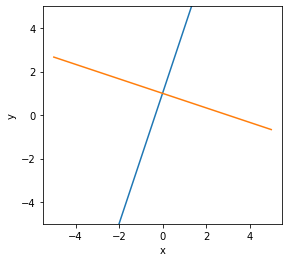

In [52]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5, 5, 21)
y = 3*x+1
y2 = -1/3*x+1
plt.figure(figsize=(5,4))
plt.plot(x, y, x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-5, 5)
plt.axes().set_aspect(1)
plt.show()

Прямые на ролике не кажутся перпендикулярными из-за масштаба по осям

### 3. Задание (в программе)
Напишите код на Python, реализующий построение графиков:
окружности,
эллипса,
гиперболы.

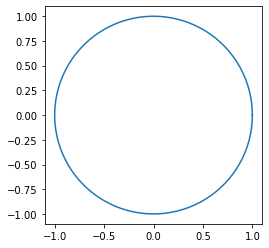

In [53]:
from numpy import sin, cos, pi
t=np.linspace(0,2*pi,100)
plt.plot(cos(t),sin(t))
plt.axes().set_aspect(1)
plt.show()

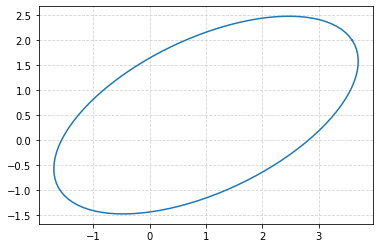

In [28]:
u=1.     #x-position of the center
v=0.5    #y-position of the center
a=3.     #radius on the x-axis
b=1.5    #radius on the y-axis
t_rot=pi/6 #rotation angle

t = np.linspace(0, 2*pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
# R_rot = np.array([[math.cos(t_rot) , -math.sin(t_rot)],[math.sin(t_rot) , math.cos(t_rot)]])
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])
     #2-D rotation matrix

Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])

#plt.plot( u+Ell[0,:] , v+Ell[1,:] )     #initial ellipse
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:])    #rotated ellipse
plt.grid(color='lightgray',linestyle='--')
plt.show()

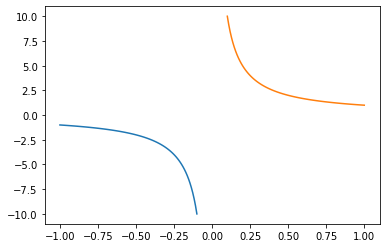

In [45]:
x1 = np.linspace(-1, -0.1, 100)
x2 = np.linspace(0.1, 1, 100)
y1 = 1/x1
y2 = 1/x2
plt.plot(x1, y1, x2, y2)

plt.show()

### 4. Задание (на листочке)
1) Пусть задана плоскость: $A\cdot x + B \cdot y + C \cdot z + D = 0$ Напишите уравнение плоскости, параллельной данной и проходящей через начало координат.

Уравнение параллельной плоскости имеет теже коэффициенты при $x, y, z$ и $D=0$, т.е $$A\cdot x + B \cdot y + C \cdot z = 0$$

2)  Пусть задана плоскость: $A_1x + B_1y + C_1z + D_1 = 0$
и прямая: $\displaystyle \frac{x-x_1}{x_2-x_1}=\frac{y-y_1}{y_2-y_1}=\frac{z-z_1}{z_2-z_1}$ Как узнать, принадлежит прямая плоскости или нет?

Прямая принадлежит плоскости, если две её точки принадлежат этой плоскости. Если точки с координатами $(x_1, y_1, z_1)$ и $(x_2, y_2, z_2)$ удовлетворяют уравнению плоскости $A_1x + B_1y + C_1z + D_1 = 0$ то прямая принадлежит этой плоскости, т.е выполнено соотношение: $$\begin{matrix}A_1x_1 + B_1y_1 + C_1z_1 + D_1 = 0\\ 
A_1x_2 + B_1y_2 + C_1z_2 + D_1 = 0 \end{matrix}$$

### 5. Задание (в программе)
Нарисуйте трехмерный график двух параллельных плоскостей.

Нарисуйте трехмерный график двух любых поверхностей второго порядка.

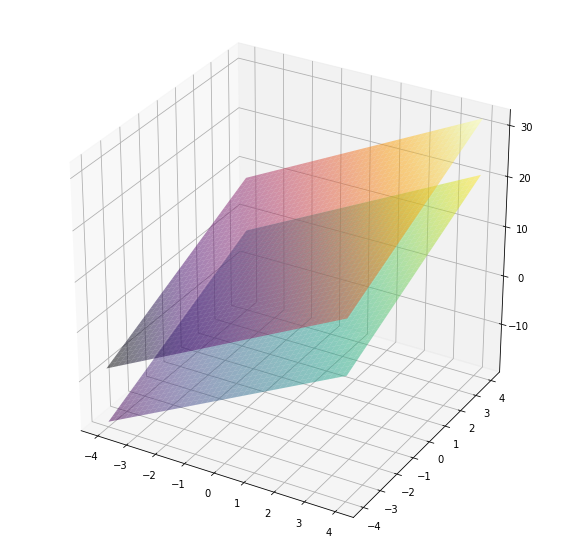

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# уравнение поверхности
f = lambda x, y: 3*x + 2*y + 12
f1 = lambda x, y: 3*x + 2*y + 1
# создаём полотно для рисунка
fig = plt.figure(figsize = (10, 10))
# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')
# повернем для лучшего вида
#ax.view_init(azim=60)
# размечаем границы осей для аргументов
xval = np.linspace(-4, 4, 200)
yval = np.linspace(-4, 4, 200)
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
z = f(x, y)
z1 = f1(x, y)
# создаём поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
x, y, z, alpha=0.5,
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 5,
cstride = 5,
# цветовая схема plasma
#cmap = cm.plasma)
#cmap = cm.viridis)
cmap = cm.inferno)
# рисуем вторую поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
x, y, z1, alpha=0.5,
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 5,
cstride = 5,
# цветовая схема plasma
cmap = cm.viridis)

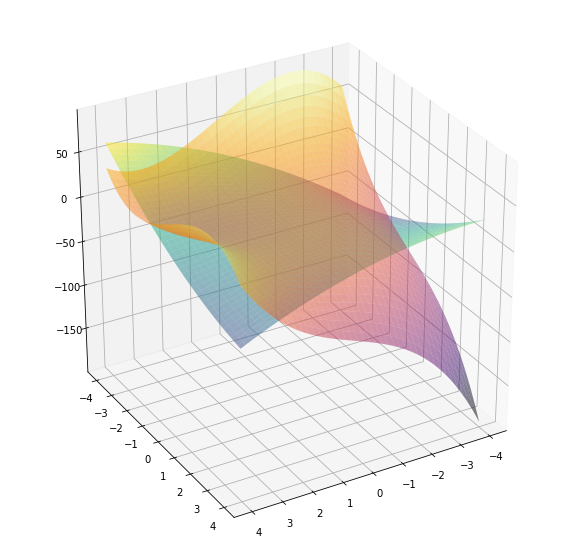

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# уравнение поверхности
f = lambda x, y: x ** 3 - 3*x**2 - y ** 3 + 2*x**2 - 3*x + 4*x*y
f1 = lambda x, y: -x ** 2 + y ** 2 - 3*x*y + 4*x
# создаём полотно для рисунка
fig = plt.figure(figsize = (10, 10))
# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')
# повернем для лучшего вида
ax.view_init(azim=60)
# размечаем границы осей для аргументов
xval = np.linspace(-4, 4, 200)
yval = np.linspace(-4, 4, 200)
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
z = f(x, y)
z1 = f1(x, y)
# создаём поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
x, y, z, alpha=0.5,
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 5,
cstride = 5,
# цветовая схема plasma
#cmap = cm.plasma)
#cmap = cm.viridis)
cmap = cm.inferno)
# рисуем вторую поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
x, y, z1, alpha=0.5,
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 5,
cstride = 5,
# цветовая схема plasma
cmap = cm.viridis)

НЕ смог построить кривую пересечения поверхностей - без нее пересечение плохо видно. Подскажите пожалуйста как это сделать средствами Python.

## Часть 2

### 1. Задание (в программе)
Нарисуйте график функции:
y(x) = k∙cos(x – a) + b
для некоторых (2-3 различных) значений параметров k, a, b

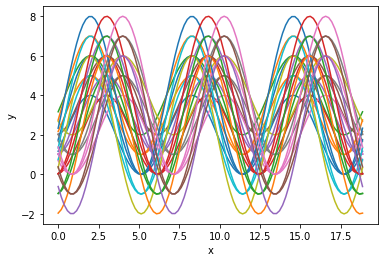

In [96]:
x = np.linspace(0, 6*pi, 100)
k = [2, 3, 4]
a = [2, 3, 4]
b = [2, 3, 4]
y = np.zeros((27, 100))
b = 0
for i in k:
    for j in a:
        for s in k:
            y[b:] = i*cos(x-j)+s
            b += 1       

for i in range(b):
    plt.plot(x, y[i,:])

plt.xlabel('x')
plt.ylabel('y')
plt.show()


### 2. Задание 
Докажите, что при ортогональном преобразовании сохраняется расстояние между точками.

Для точек $(x_1, y_1)$ и $(x_2, y_2)$ растояние равно $L=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$

Ортогональное преобразование:

$\begin{cases} X = a_{11}x+a_{12}y+a_{13} \\
Y = a_{21}x+a_{22}y+a_{23} \end{cases}$

При этом:

$\begin{cases}
a_{11}^2+a_{21}^2=1\\
a_{21}^2+a_{22}^2=1\\
a_{11}a_{12}+a_{21}a_{22}=0
\end{cases}$

Тогда расстояние между точками после преобразования равно:

$L=\sqrt{a_{11}^2(x_2-x_1)^2+a_{12}^2(y_2-y_1)^2-2a_{11}a_{12}(x_2-x_1)(y_2-y_1)+a_{21}^2(x_2-x_1)+a_{22}^2(y_2-y_1)-2a_{21}a_{22}(x_2-x_1)(y_2-y_1)}=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$

### 3. Задание (в программе)
#### 3.1 Напишите код, который будет переводить полярные координаты в декартовы.

In [101]:
def pol_to_dec(r:float, f:float)->(float, float):
    from math import sin, cos
    """Translate polat coordinate to Decart
    param: r - radius
    param: f - angle in radians
    return: (x, y)"""
    return (r*cos(f), r*sin(f))

In [150]:
import math
pol_to_dec(1, math.pi/4)

(0.7071067811865476, 0.7071067811865475)

#### 3.2 Напишите код, который будет рисовать график окружности в полярных координатах.


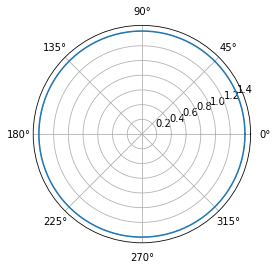

In [138]:
import matplotlib.pyplot as plt
import numpy as np
theta = np.linspace(0, 2*np.pi, 100)

plt.polar(theta, [1.4]*len(theta))  # окружность

plt.show()

#### 3.3 Напишите код, который будет рисовать график отрезка прямой линии в полярных координатах.

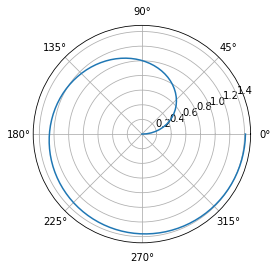

In [147]:
import matplotlib.pyplot as plt
import numpy as np
theta = np.linspace(0, 2*np.pi, 100)

plt.polar(theta, np.arctan(theta))

plt.show()

### 4. Задание (в программе)
#### 4.1 Решите систему уравнений:
$\begin{matrix}y = x^2 – 1\\
\exp(x) + x\cdot(1 – y) = 1\end{matrix}$


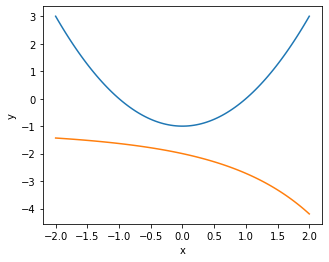

In [179]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2, 2, 100)
y1 = x**2-1
y2 = (1-x-np.exp(x))/x
plt.figure(figsize=(5,4))
plt.plot(x, y1, x, y2)
plt.xlabel('x')
plt.ylabel('y')
# plt.ylim(-4, 1)
plt.show()

In [175]:
from scipy.optimize import fsolve
def equations(p):
    x, y = p
    return (y-x**2+1, np.exp(x)+x*(1-y)-1)
fsolve(equations, (1, 0))

array([ 6.51825754e-15, -1.00000000e+00])

#### 4.2 Решите систему уравнений и неравенств:
$\begin{matrix}y = x^2 – 1\\
\exp(x) + x \cdot (1 – y) > 1\end{matrix}$


In [183]:
from scipy.optimize import fsolve
def equations(p):
    x, y = p
    return (y-x**2+1, np.exp(x)+x*(1-y)>1)
fsolve(equations, (0, 0))

array([-7.21680063e-36, -1.00000000e+00])